<center><h1 style="color:red">Mushroom Exploration (EDA with Visualizations)</h1>
<h2>BY/ Kassem@elcaiseri<h2></center>

# Content:
## 1. Data handel:
   * Import data  
   * Work with data
   * Check for NAN values
   * Encode data
   * Show data descriptions
   
## 2. Visualizations:
   * Set Visualizations function and params
   * Plot count value of  columns function
   * Visualize the number of mushrooms for each cap categorize.
   * Number of mushrooms based on "odor"
   * Plot pairwise relationships in a mushrooms for each stalk categorize
   * Between habitat and population

## Data Handel
* **Import main libraries for Visualizations and data handels**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

* **Walk into input file path **

In [2]:
import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

input/mushrooms.csv


* **Import data**

In [3]:
data_path = os.path.join(dirname, filename)
data = pd.read_csv(data_path)
data.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

* **Show data size**

In [4]:
data.shape

(8124, 23)

* **Check for any NAN values**

In [5]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

* **Show text data descriptions**

In [6]:
data.describe()

class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top                         w                      w         p          w   
freq                     4464                   4384      8124       7924   

       ring-number ring-type spore-print-color population habitat  
count         8124      8124              8124       8124    8124  
unique           3         5                 9          6       7  
top              o         p                 w          v       d  
freq          7488      3968              2388       4040    3148  

[4 rows x 23 columns]

* **Encode texted data to can describe it**

In [7]:
from sklearn.preprocessing import LabelEncoder

data_encoded = data.copy()
le = LabelEncoder()
for col in data_encoded.columns:
    data_encoded[col] = le.fit_transform(data_encoded[col]) 
    
data_encoded.head()

class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0                       7                       7          0           2   
1                       7                       7          0           2   
2                       7                       7          0           2   
3                       7                       7          0           2   
4                       7                       7          0           2   

   ring-number  ring-type  spore-print-color  population  habitat  
0            1          4                  2           3        5  
1            1          4                  3           2        1  
2            1          4                  3           2        3  
3            1          4                  2           3        5  
4            1          0                  3           0        1  

[5 rows x 23 columns]

In [8]:
data_encoded.describe()

class    cap-shape  cap-surface    cap-color      bruises  \
count  8124.000000  8124.000000  8124.000000  8124.000000  8124.000000   
mean      0.482029     3.348104     1.827671     4.504677     0.415559   
std       0.499708     1.604329     1.229873     2.545821     0.492848   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     2.000000     0.000000     3.000000     0.000000   
50%       0.000000     3.000000     2.000000     4.000000     0.000000   
75%       1.000000     5.000000     3.000000     8.000000     1.000000   
max       1.000000     5.000000     3.000000     9.000000     1.000000   

              odor  gill-attachment  gill-spacing    gill-size   gill-color  \
count  8124.000000      8124.000000   8124.000000  8124.000000  8124.000000   
mean      4.144756         0.974151      0.161497     0.309207     4.810684   
std       2.103729         0.158695      0.368011     0.462195     3.540359   
min       0.000000         0.000000      0.000000     0.000000     0.000000   
25%       2.000000         1.000000      0.000000     0.000000     2.000000   
50%       5.000000         1.000000      0.000000     0.000000     5.000000   
75%       5.000000         1.000000      0.000000     1.000000     7.000000   
max       8.000000         1.000000      1.000000     1.000000    11.000000   

       ...  stalk-surface-below-ring  stalk-color-above-ring  \
count  ...               8124.000000             8124.000000   
mean   ...                  1.603644                5.816347   
std    ...                  0.675974                1.901747   
min    ...                  0.000000                0.000000   
25%    ...                  1.000000                6.000000   
50%    ...                  2.000000                7.000000   
75%    ...                  2.000000                7.000000   
max    ...                  3.000000                8.000000   

       stalk-color-below-ring  veil-type   veil-color  ring-number  \
count             8124.000000     8124.0  8124.000000  8124.000000   
mean                 5.794682        0.0     1.965534     1.069424   
std                  1.907291        0.0     0.242669     0.271064   
min                  0.000000        0.0     0.000000     0.000000   
25%                  6.000000        0.0     2.000000     1.000000   
50%                  7.000000        0.0     2.000000     1.000000   
75%                  7.000000        0.0     2.000000     1.000000   
max                  8.000000        0.0     3.000000     2.000000   

         ring-type  spore-print-color   population      habitat  
count  8124.000000        8124.000000  8124.000000  8124.000000  
mean      2.291974           3.596750     3.644018     1.508616  
std       1.801672           2.382663     1.252082     1.719975  
min       0.000000           0.000000     0.000000     0.000000  
25%       0.000000           2.000000     3.000000     0.000000  
50%       2.000000           3.000000     4.000000     1.000000  
75%       4.000000           7.000000     4.000000     2.000000  
max       4.000000           8.000000     5.000000     6.000000  

[8 rows x 23 columns]

* **Show data columns**

In [9]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

## Visualizations
* **Set Visualizations function and params**

In [10]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

* * **Plot count value of  columns function**

In [11]:
def plot_col(col, hue=None, color=['red', 'lightgreen'], labels=None):
    fig, ax = plt.subplots(figsize=(15, 7))
    sns.countplot(col, hue=hue, palette=color, saturation=0.6, data=data, dodge=True, ax=ax)
    ax.set(title = f"Mushroom {col.title()} Quantity", xlabel=f"{col.title()}", ylabel="Quantity")
    if labels!=None:
        ax.set_xticklabels(labels)
    if hue!=None:
        ax.legend(('Poisonous', 'Edible'), loc=0)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


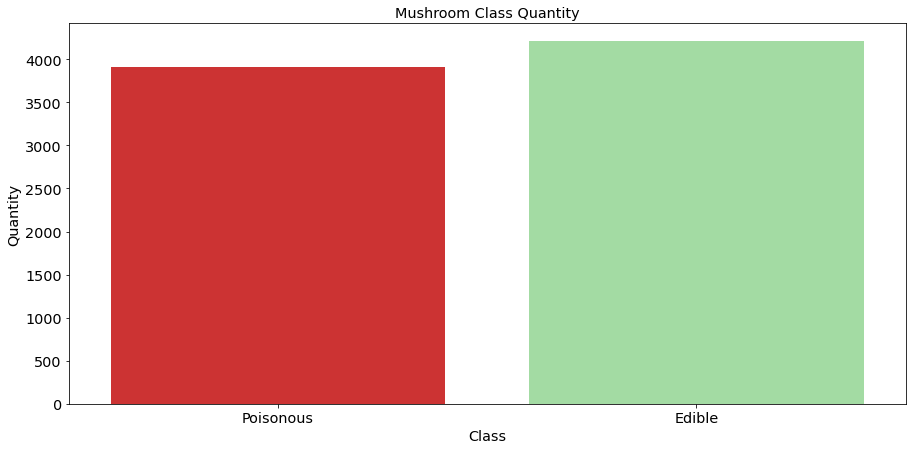

In [12]:
class_dict = ('Poisonous', 'Edible')
plot_col(col='class', labels=class_dict)

* **Visualize the number of mushrooms for each cap categorize.**

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


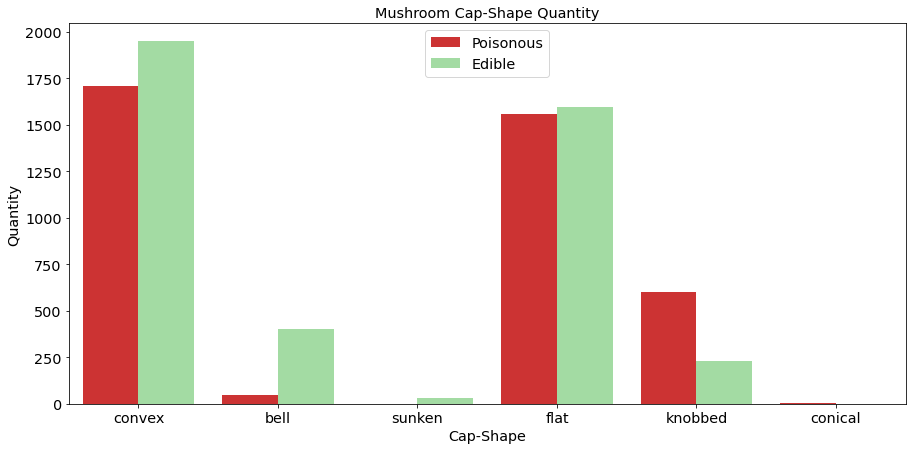

In [13]:
shape_dict = {"bell":"b","conical":"c","convex":"x","flat":"f", "knobbed":"k","sunken":"s"}
labels = ('convex', 'bell', 'sunken', 'flat', 'knobbed', 'conical')
plot_col(col='cap-shape', hue='class', labels=labels)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


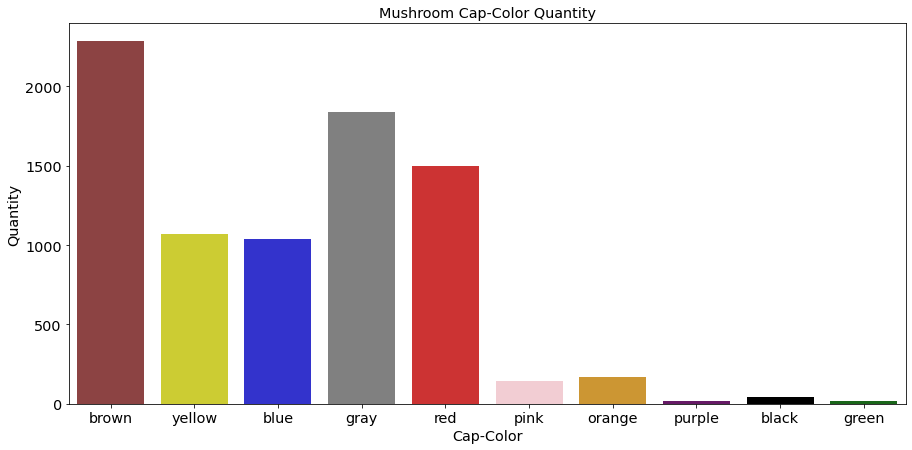

In [14]:
color_dict = {"brown":"n","yellow":"y", "blue":"w", "gray":"g", "red":"e","pink":"p",
              "orange":"b", "purple":"u", "black":"c", "green":"r"}
plot_col(col='cap-color', color=color_dict.keys(), labels=color_dict)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


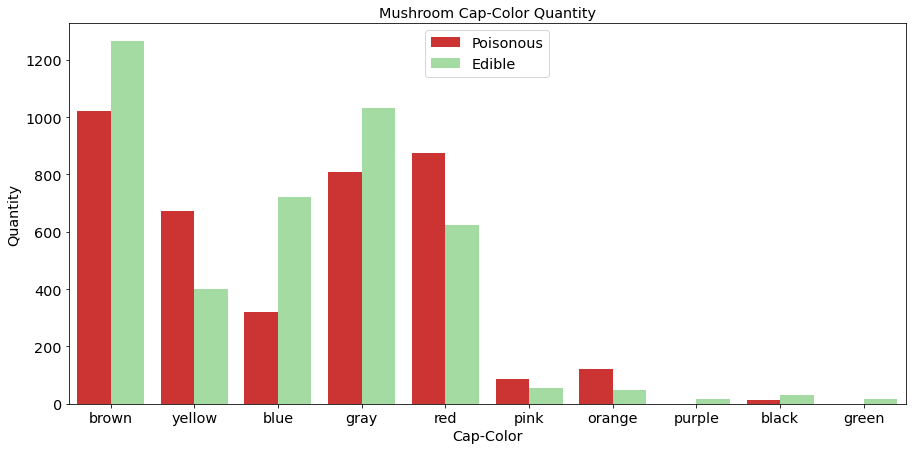

In [15]:
plot_col(col='cap-color', hue='class', labels=color_dict)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


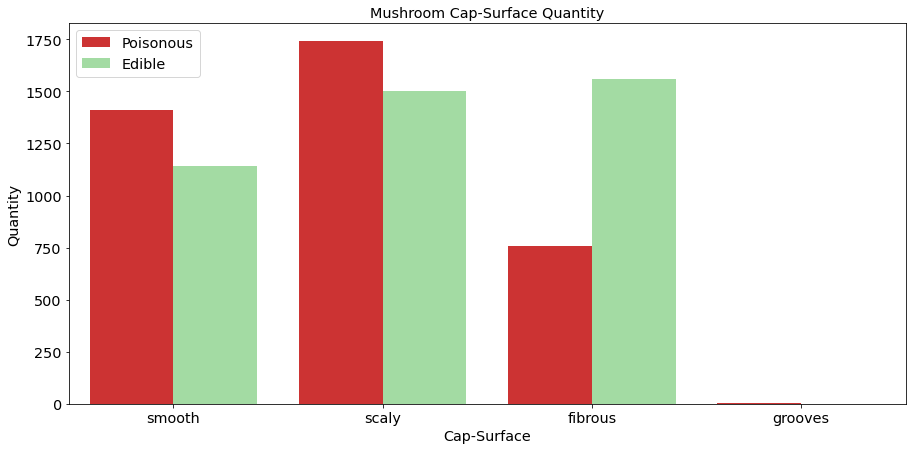

In [16]:
surface_dict = {"smooth":"s", "scaly":"y", "fibrous":"f","grooves":"g"}
plot_col(col='cap-surface', hue='class', labels=surface_dict)

In [17]:
def get_labels(order, a_dict):    
    labels = []
    for values in order:
        for key, value in a_dict.items():
            if values == value:
                labels.append(key)
    return labels

* **Number of mushrooms based on "odor"**

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


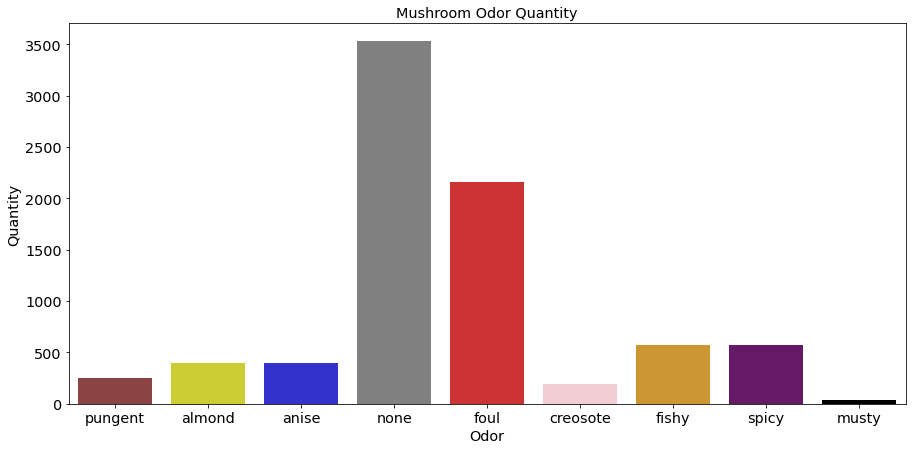

In [18]:
odor_dict = {"almond":"a","anise":"l","creosote":"c","fishy":"y",
             "foul":"f","musty":"m","none":"n","pungent":"p","spicy":"s"}
order = ['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm']
labels = get_labels(order, odor_dict)      
plot_col(col='odor', color=color_dict.keys(), labels=labels)

* **<p>Plot pairwise relationships in a mushrooms for each stalk categorize.</p>**

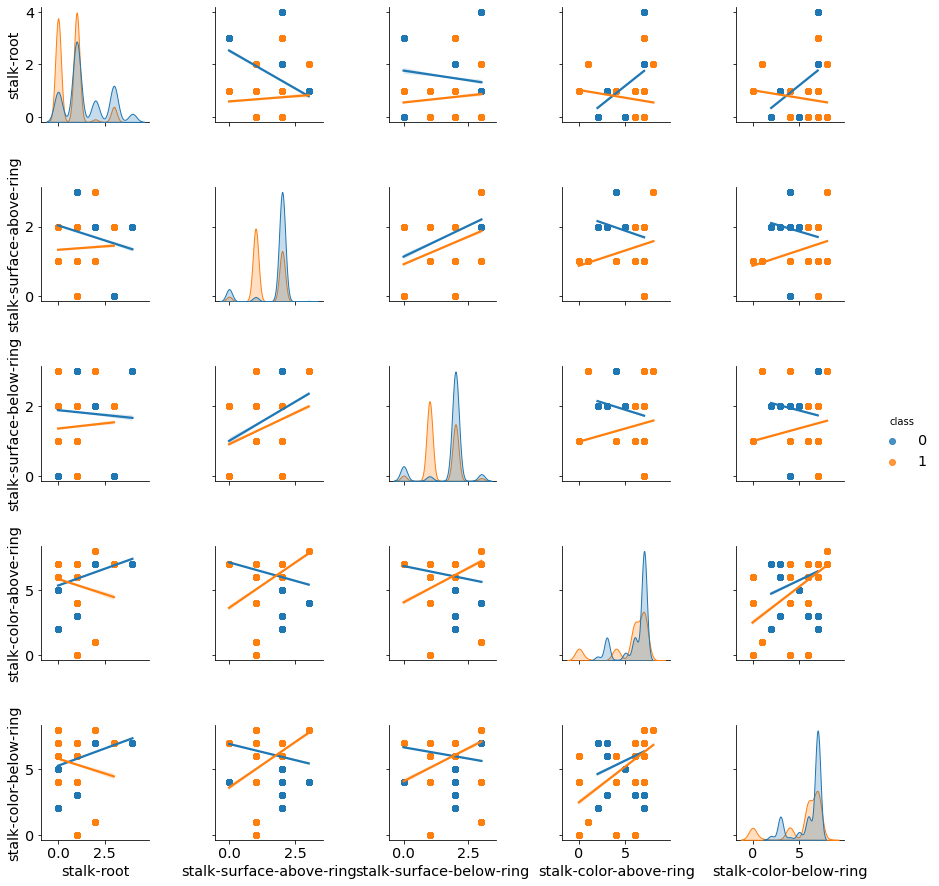

In [19]:
stalk_cats = ['class', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 
              'stalk-color-above-ring', 'stalk-color-below-ring']
data_cats = data_encoded[stalk_cats]
sns.pairplot(data_cats, hue='class', kind='reg')

* **Visualize the distribution in a mushrooms for each stalk categorize.**

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

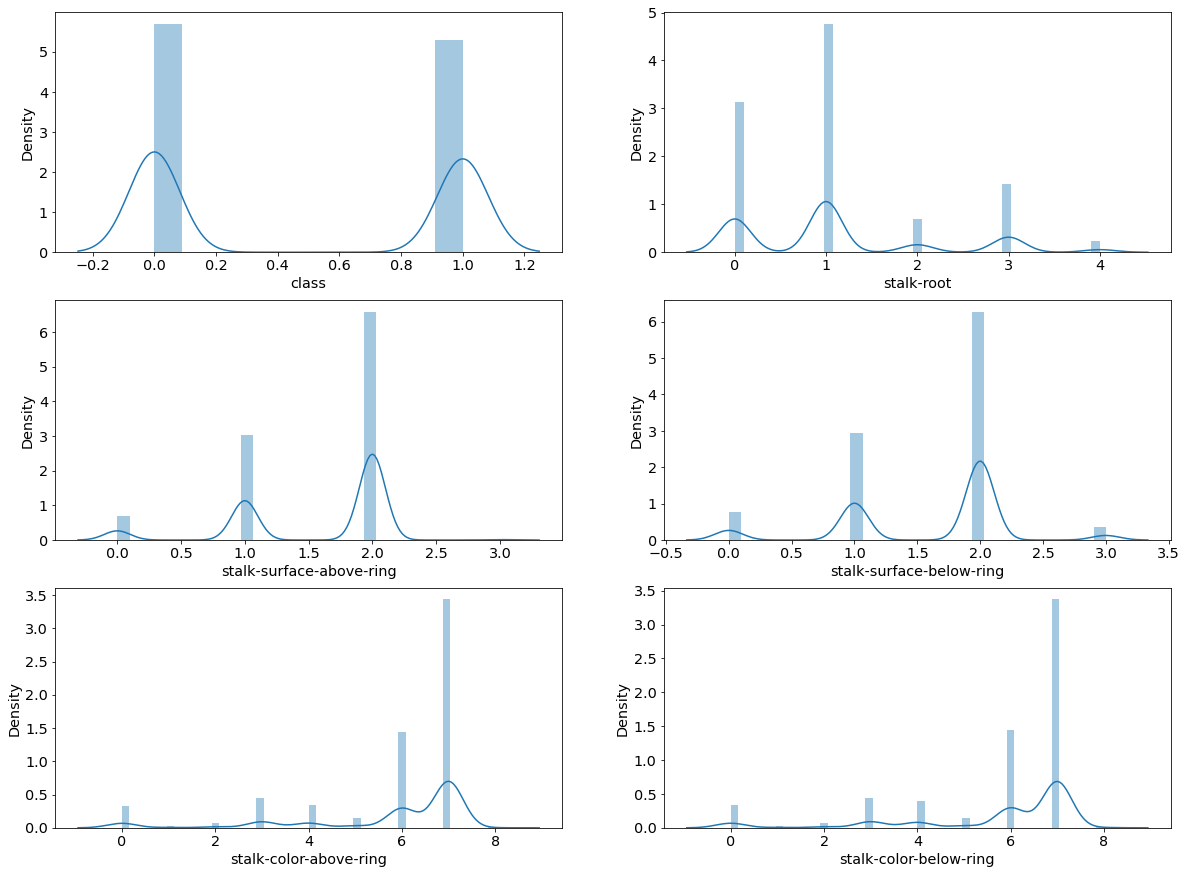

In [20]:
fig, ax = plt.subplots(3, 2, figsize=(20, 15))
for i, axis in enumerate(ax.flat):
    sns.distplot(data_cats.iloc[:, i], ax=axis)

* **Between habitat and population**

In [21]:
pop_dict = {"abundant":"a","clustered":"c","numerous":"n","scattered":"s","several":"v","solitary":"y"}
hab_dict = {"grasses":"g","leaves":"l","meadows":"m","paths":"p","urban":"u","waste":"w","woods":"d"}

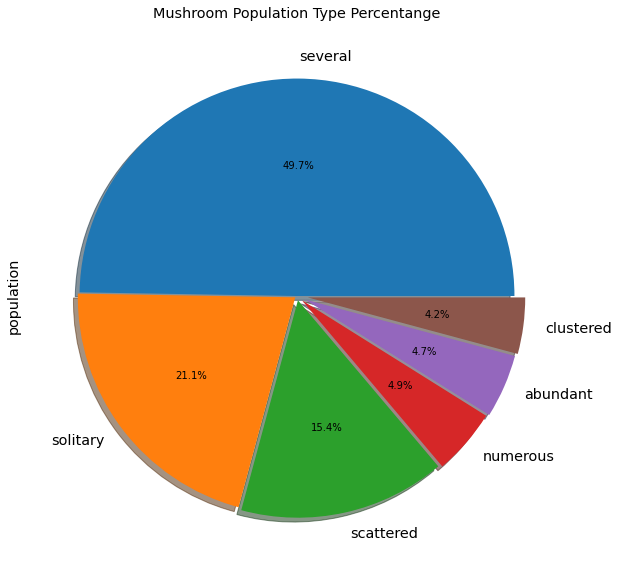

In [22]:
f, ax = plt.subplots(figsize=(15, 10))
order = list(data['population'].value_counts().index)
pop_labels = get_labels(order, pop_dict)
explode = (0.0,0.01,0.02,0.03,0.04,0.05)
data['population'].value_counts().plot.pie(explode=explode , autopct='%1.1f%%', labels=pop_labels, shadow=True, ax=ax)
ax.set_title('Mushroom Population Type Percentange');

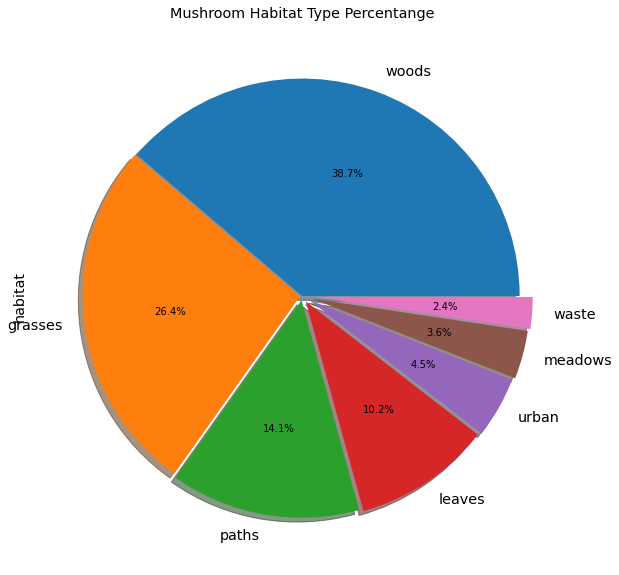

In [23]:
f, ax = plt.subplots(figsize=(15, 10))
order = list(data['habitat'].value_counts().index)
hab_labels = get_labels(order, hab_dict)
explode = (0.0,0.01,0.02,0.03,0.04,0.05, 0.06)
data['habitat'].value_counts().plot.pie(explode=explode, autopct='%1.1f%%', labels=hab_labels, shadow=True, ax=ax)
ax.set_title('Mushroom Habitat Type Percentange');

<h3>Thanks for being here, if you find it useful <span style="color:red">UPVOTE</span>  it, feel free in comment</h3>